# FORESEE - Heavy Neutral Leptons (HNLs)

### Load Libraries 

In [1]:
import numpy as np
import sys
import os
#import matplotlib.colors as mcolors
src_path = "../.."
sys.path.append(src_path)
from src.foresee import Foresee, Utility, Model

from HeavyNeutralLepton import * 

from matplotlib import pyplot as plt
#import pandas as pd
#import os
#import glob

#from matplotlib import pyplot as plt
#import pandas as pd
#from os.path import exists

#from scipy.integrate import quad

## 1. Initialization 


All function that we will need are included in the FORESEE package. We start by simply initializing it: 

In [2]:
foresee = Foresee()

HNL's are produced mainly via D and $B$ meson decay. To start, let us have a look at the $\text{D}^+$ spectrum in terms of the angle with respect to the beam axis $\theta$ and the momentum $p$. This can be done using the function `get_spectrumplot` which requires the MC particle ID (or simply pid), the MC generator and the energy. The units on the coloraxis are pb/bin. 

FORESEE provides the 2D spectrum as tables for a variety of particles ($\pi$, $\eta$, D, B, ...), generators (SIBYLL, EPOSLHC, QGSJET, PYTHIA) and collision energies (14, 27 and 100 TeV). The datafiles are stored in the directory `files/hadrons`. Let us show the $\text{D}^+$ spectrum obained by Pythia8. 

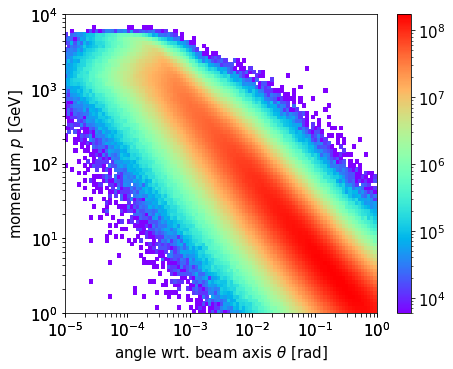

In [3]:
plot=foresee.get_spectrumplot(pid="310", generator="SIBYLL", energy="14",  prange=[[-5, 0, 100],[ 0, 4, 80]])
#plt.savefig(f'path',bbox_inches='tight')
plot.show()

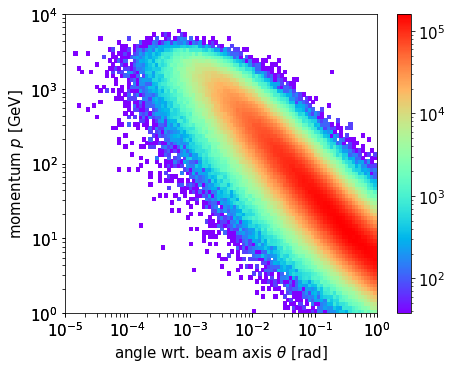

In [4]:
plot=foresee.get_spectrumplot(pid="511", generator="pythia8", energy="14",  prange=[[-5, 0, 100],[ 0, 4, 80]])
#plt.savefig(f'path',bbox_inches='tight')
plot.show()

## 2. Specifying the Model: Heavy Neutral Leptons

In this notebook we consider Heavy Neutral Leptons (HNLs) $N$. These for example naturally arise in models with an addition right handed neutrinos. Their phenomenology is described by a the folling Lagrangian 

\begin{equation}
 \mathcal{L} = \bar N (i \gamma^\mu \partial_{\mu} - {m_N}) N - (g/\sqrt{2}) {U_{\alpha}} W_\mu \bar \ell_\alpha \gamma^\mu N - (g/\sqrt{2} c_W) {U_{\alpha}} Z_\mu \bar \nu_\alpha \gamma^\mu N 
\end{equation}

where ${m_N}$ is the HNL mass, and ${U_{\alpha}}$ are the mixings of the HNL with the SM neutrinos of flavour $\alpha=e,\mu, \tau$. For practical purposes, we will define ${U_{\alpha}} = {\epsilon} \times V_\alpha$ where $V_\alpha$ is fixed. In this case the HNL mass ${m_N}$ and the coupling ${\epsilon}$ are the free parameters of the model. 

Since the HNL model is rather complicted, we will use dedicated the `HeavyNeutralLepton` class, which will provide all properties of the model, eg their the *production rate*, the *lifetime* and their *decay branching fractions*. It will be initialized with the values of $V_\alpha$.

In [5]:
hnl = HeavyNeutralLepton(ve=1, vmu=0, vtau=0)
nsteps_mass=10
nsteps=10

All properties are specified in the `Model` class. We initialize it with the name of the model as argument. 

In [6]:
energy = "14"
modelname="HNL"
model = Model(modelname, path="./")
allchannels = []
production_channels=[]

### a) HNL Production
As most LLPs, HNLs are produced in the decay of primary hadrons. Here we need to specify the total branching fraction into the LLP as function of the `coupling` and the `mass`. 

**Production via 2-body decays** HNLs can be produced in 2-body decays of the type $H^+ \to \ell N$. The corresponding branching fractions are given by  

\begin{equation}
    \text{BR}(H^+ \rightarrow \ell_{\alpha}^{+} N ) =   |U_{\alpha}|^2 \frac{G_F^2 M_H M_N^2 \tau_H f_H^2 |V_H|^2 }{8 \pi}  \cdot \left[ 1- \frac{M_N^2}{M_H^2} + 2 \frac{M_{\ell}^2}{M_H^2}+ \frac{M_{\ell}^2}{M_N^2} \left( 1- \frac{M_{\ell}^2}{M_H^2} \right) \right] \times \left[\left(1+ \frac{M_N^2}{M_H^2}- \frac{M_{\ell}^2}{M_H^2}\right)^2 - 4 \frac{M_N^2}{M_H^2}\right]^{1/2}
\end{equation}

Source: https://cds.cern.ch/record/2133817/files/main.pdf

In particular we consider the decays:
- $D^\pm, D_s^\pm, B^\pm, B_c^\pm \to \ell^\pm N$

In [7]:
#colors for plots
import matplotlib.colors as mcolors
import random
colors=list(mcolors.TABLEAU_COLORS)
length=len(colors)

In [8]:
#2 body pseudoscalar meson decays
#elements in channels have the form [decay label, parent particle pid (with sign), sign of produced lepton PID (- for positron + for electron),generator]
channels = [
    [r'D^+ \to l^+ + N'    , '411', '-',"Pythia8"],
    [r'D^- \to l^- + N'    ,'-411', '' ,"Pythia8"],
    [r'D_s^+ \to l^+ + N'  , '431', '-',"Pythia8"],
    [r'D_s^- \to l^- + N'  ,'-431', '' ,"Pythia8"],
    [r'B^+ \to + l^+ + N'  , '521', '-',"Pythia8"],
    [r'B^- \to + l^- + N'  ,'-521', '' ,"Pythia8"],
    [r'B_c^+ \to + l^+ + N', '541', '-',"Pythia8"],
    [r'B_c^- \to + l^- + N','-541', '' ,"Pythia8"],
    [r'pi^+ \to + l^+ + N','211', '-' ,"EPOSLHC"],
    [r'pi^- \to + l^- + N','-211', '' ,"EPOSLHC"],
    [r'K^+ \to + l^+ + N','321', '-' ,"EPOSLHC"],
    [r'K^- \to + l^- + N','-321', '' ,"EPOSLHC"]
]


 
for label, pid_had, sign_lep, generator in channels:
    for pid_lep in ["11","13","15"]:
        if hnl.vcoupling[pid_lep] <1e-9: continue
        label1 = "2body_" + pid_had + "_" + sign_lep+pid_lep
        label2='[' + '"' + label1 + '"' + ', ' + '"' + colors[random.randint(0,length-1)] + '"' + ', ' + 'r"$' + label + '$"' + '],'
        production_channels.append(label2)
        #print(label2)
        model.add_production_2bodydecay(
            label = label1,
            pid0 = pid_had,
            pid1 = pid_lep,
            br = hnl.get_2body_br(pid_had, sign_lep+pid_lep),
            generator = generator,
            energy = energy,
            nsample = nsteps,
        )
        allchannels.append(label1)

#print(nsteps)

**Production via 2-body $\tau$ decays** HNLs can be produced in 2-body decays of the type $\tau \to H N$, the corresponding branching fraction is given by

\begin{aligned}
    \mathrm{Br}(\tau \rightarrow \mathrm{HN}) &=\tau_\tau \cdot \frac{\left|U_\tau\right|^2}{16 \pi} G_F^2\left|V_H\right|^2 f_H^2 M_\tau^3 \cdot\left(\left(1-\frac{M_N^2}{M_\tau^2}\right)^2-\frac{M_H^2}{M_\tau^2}\left(1+\frac{M_N^2}{M_\tau^2}\right)\right) \\
    & \times \sqrt{\left(1-\frac{\left(M_H-M_N\right)^2}{M_\tau^2}\right)\left(1-\frac{\left(M_H+M_N\right)^2}{M_\tau^2}\right)}
\end{aligned}

or of the form $\tau \to \rho N$, in this case the branching fraction is given by

\begin{aligned}
    \mathrm{Br}(\tau \rightarrow \rho \mathrm{N}) &=\tau_\tau \cdot \frac{\left|U_\tau\right|^2}{8 \pi} \frac{g_\rho^2}{M_\rho^2} G_F^2\left|V_{u d}\right|^2 M_\tau^3 \cdot\left(\left(1-\frac{M_N^2}{M_\tau^2}\right)^2+\frac{M_\rho^2}{M_\tau^2}\left(1+\frac{M_N^2-2 M_\rho^2}{M_\tau^2}\right)\right) \\
    & \times \sqrt{\left(1-\frac{\left(M_\rho-M_N\right)^2}{M_\tau^2}\right)\left(1-\frac{\left(M_\rho+M_N\right)^2}{M_\tau^2}\right)}
\end{aligned}

Source: https://cds.cern.ch/record/2133817/files/main.pdf

In particular we consider the decays:
- $\tau^{\pm} \to \pi^{\pm},K^{\pm}, \rho^{\pm} N$

In [9]:
#tau 2 body decays
#elements in channels have the form [decay label, parent particle pid, produced hadron pid (without sign), sign of produced hadron, generator]
channels = [
[r'\tau^- \to \pi^- + N','15','211', '-' , "Pythia8"],
[r'\tau^+ \to \pi^+ + N','-15','211', ''  , "Pythia8"],
[r'\tau^- \to K^- + N'  ,'15','321', '-' , "Pythia8"],
[r'\tau^+ \to K^+ + N'  ,'-15','321', ''  , "Pythia8"],
[r'\tau^- \to \rho^- + N','15','213', '-', "Pythia8"],
[r'\tau^+ \to \rho^+ + N','-15','213', '' , "Pythia8"]
]


for label, pid_tau, pid_had, sign_had, generator in channels:
    if hnl.vcoupling[str(abs(int(pid_tau)))] <1e-9: continue
    label1 = "2body_tau_" + pid_tau + "_" + sign_had+pid_had
    label2='[' + '"' + label1 + '"' + ', ' + '"' + colors[random.randint(0,length-1)] + '"' + ', ' + 'r"$' + label + '$"' + '],'
    production_channels.append(label2)
    #print(label2)
    model.add_production_2bodydecay(
        label = label1,
        pid0 = pid_tau,
        pid1 = pid_had,
        br = hnl.get_2body_br_tau(pid_tau, sign_had+pid_had),
        generator = generator,
        energy = energy,
        nsample = nsteps,
    )
    allchannels.append(label1)

**Production via 3-body decay to pseudoscalar meson** HNLs can also be produced in 3-body decays of the type $H \to H' \ell N$, where H' is a pseudoscalar. The corresponding branching fractions in the rest frame are given by  

\begin{aligned}
&\frac{d \mathrm{Br}\left(\mathrm{H} \rightarrow \mathrm{H}^{\prime} \mathrm{l}_\alpha^{+} \mathrm{N}\right)}{d E_N d q^2}=\tau_H \cdot\left|U_\alpha\right|^2 \cdot \frac{\left|V_{H H^{\prime}}\right|^2 G_F^2}{64 \pi^3 M_H^2} \left(f_{-}^2\left(q^2\right) \cdot\left(q^2\left(M_N^2+M_l^2\right)-\left(M_N^2-M_l^2\right)^2\right)\right. \\
&+2 f_{+}\left(q^2\right) f_{-}\left(q^2\right)\left(M_N^2\left(2 M_H^2-2 M_{H^{\prime}}^2-4 E_N M_H-M_l^2+M_N^2+q^2\right)+M_l^2\left(4 E_N M_H+M_l^2-M_N^2-q^2\right)\right) \\
& +f_{+}^2\left(q^2\right)\left(\left(4 E_N M_H+M_l^2-M_N^2-q^2\right)\left(2 M_H^2-2 M_{H^{\prime}}^2-4 E_N M_H-M_l^2+M_N^2+q^2\right)\right. \\
&\left.-\left(2 M_H^2+2 M_{H^{\prime}}^2-q^2\right)\left(q^2-M_N^2-M_l^2\right)\right)
\end{aligned}

where

\begin{aligned}
f_{+}\left(q^2\right) &=\frac{f_{+}(0)}{\left(1-q^2 / M_V^2\right)} \\
f_0\left(q^2\right) &=\frac{f_0(0)}{\left(1-q^2 / M_S^2\right)} \\
f_0\left(q^2\right)=f_{+}\left(q^2\right) &+\frac{q^2}{M_H^2-M_{H'}^2} f_{-}\left(q^2\right).
\end{aligned}

Source: https://cds.cern.ch/record/2133817/files/main.pdf

- For $D \rightarrow H' + \ell + \nu$ decays, $M_V$ and $M_S$ are the vector and scalar pole masses and are given by the $D^*(2010)$ and $D_0^*(2400)$ masses, respectively. $f_0(0)$ is obtained from https://arxiv.org/pdf/1511.04877.pdf (Note $f_0(0)=f_+(0)$ and $f_-(0)$ can be obtained from these)
- For $B \rightarrow D + \ell + \nu$ decays, $M_V$ and $M_S$ are the vector and scalar pole masses and are given by the $B^*_c$ and $B_c$ masses (as suggested in https://journals.aps.org/prd/pdf/10.1103/PhysRevD.62.014006), respectively. $f_0(0)$ is obtained from https://arxiv.org/pdf/1505.03925v2.pdf
- For $B_s \rightarrow D_s + \ell + \nu$ decays, $M_V$ and $M_S$ are the vector and scalar pole masses and are given by the $B^*$ and $B$ masses (as suggested in https://journals.aps.org/prd/pdf/10.1103/PhysRevD.62.014006), respectively. $f_0(0)$ is obtained from https://arxiv.org/pdf/1106.3003.pdf (table 1)
- For $B_c \rightarrow B^0 + \ell + \nu$ or $B_c \rightarrow B_s^0 + \ell + \nu$ decays, $M_V$ and $M_S$ are the vector and scalar pole masses and are given by the $B^*_c$ and $B_c$ masses, respectively. $f_0(0)$ is obtained from https://arxiv.org/pdf/hep-ph/0007169.pdf (table 2)


To obtain the branching fraction we use integration bounds
$$(m_{\ell} + m_N)^2 \leq q^2 \leq (m_H - m_{H'})^2$$ 
with 
$$q^2=m_{H \ell}^2$$
and
$$E_N({m_{\ell N}^2}^{\text{min}}) \leq E_N \leq E_N({m_{\ell N}^2}^{\text{max}})$$
where 
$$E_N = \frac{m_{\ell N}^2 + q^2 - m_{\ell}^2 - m_{H'}^2}{2m_{H}}$$
${m_{\ell N}^2}^{\text{min}}$ and ${m_{\ell N}^2}^{\text{max}}$ are as given in https://pdg.lbl.gov/2019/reviews/rpp2019-rev-kinematics.pdf 

(we use the convention $H \sim 0$, $H' \sim 1$, $\ell \sim 2$, and $N \sim 3$; e.g. $m_{23}^2=m_{\ell N}^2$)

In particular we consider the decays:
- $D^0 \to K^{\mp} \ell^{\pm} N, \text{ where } \ell \neq \tau$ (since $D^0$ is not heavy enough)
- $D^{\pm} \to \bar{K^0}  \ell^{\pm} N, \text{ where } \ell \neq \tau$
- $B^{\pm} \to \bar{D^0} \ell^{\pm} N, \text{ including } \tau$
- $B^0 \to D^{\mp} \ell^{\pm} N, \text{ including } \tau$
- $B_s^0 \to D_s^{\mp} \ell^{\pm} N, \text{ including } \tau$
- $B_c^{\pm} \to B^0 \ell^{\pm} N, \text{ where } \ell \neq \tau$
- $B_c^{\pm} \to B_s^0 \ell^{\pm} N, \text{ where } \ell \neq \tau$ 

In [10]:
#3 body decay into pseudoscalar mesons
#elements of 'channels' have the form [decay label, pid of parent hadron, pid of daughter meson (with sign!), sign of produced lepton's pid]
channels = [
    [r'D^0 \to K^- + l^+ + N'             , '421' , '-321' , '-', "Pythia8"],
    [r'D^0 \to K^+ + l^- + N'             , '-421', '321'  , '' , "Pythia8"],
    [r'D^+ \to \bar{K}^0 + l^+ + N'       , '411' , '-311' , '-', "Pythia8"],
    [r'D^- \to K^0 + l^- + N'             ,'-411' , '311'  , '' , "Pythia8"],
    [r'B^+ \to \bar{D}^0 + l^+ + N'       , '521' ,  '-421', '-', "Pythia8"],
    [r'B^- \to D^0 + l^- + N'             , '-521',  '421' , '' , "Pythia8"],
    [r'B^0 \to D^- + l^+ + N'             , '511' , '-411' , '-', "Pythia8"],
    [r'B^0 \to D^+ + l^- + N'             , '-511', '411'  , '' , "Pythia8"],
    [r'B^0_s \to D^-_s + l^+ + N'         , '531' , '-431' , '-', "Pythia8"],
    [r'B^0_s \to D^+_s + l^- + N'         , '-531', '431'  , '' , "Pythia8"],
    [r'B^+_c \to B^0 + l^+ + N'           , '541' ,  '511' , '-', "Pythia8"],
    [r'B^-_c \to \bar{B}^0 + l^- + N'     , '-541',  '-511', '' , "Pythia8"],
    [r'B^+_c \to B^0_s + l^+ + N'         , '541' ,  '531' , '-', "Pythia8"],
    [r'B^-_c \to \bar{B}^0_s + l^- + N'   , '-541',  '-531', '' , "Pythia8"],
    [r'K^0_S \to \pi^+ + l^- + N', '310', '211', '' , "SIBYLL"],
    [r'K^0_S \to \pi^- + l^+ + N', '310', '-211', '-', "SIBYLL"],
    [r'K^0_L \to \pi^+ + l^- + N', '130', '211', '' , "SIBYLL"],
    [r'K^0_L \to \pi^- + l^+ + N', '130', '-211', '-', "SIBYLL"]

]


for label, pid_parent, pid_daughter, sign_lep, generator in channels:
    if model.masses(pid_parent) >= model.masses('15') + model.masses(pid_daughter):
        leptons=["11","13","15"]
    if model.masses(pid_parent) <= model.masses('15') + model.masses(pid_daughter):
        leptons=["11","13"]
    for pid_lep in leptons:
        if hnl.vcoupling[pid_lep] <1e-9: continue
        label1="3body_pseudo_" + pid_parent + "_" +pid_daughter+ "_" + sign_lep+pid_lep
        label2='[' + '"' + label1 + '"' + ', ' + '"' + colors[random.randint(0,length-1)] + '"' + ', ' + 'r"$' + label + '$"' + '],'
        production_channels.append(label2)
        #print(label2)
        #print('[' + '"' + label1 + '"' + ', ' + '"' + colors[random.randint(0,length-1)] + '"' + ', ' + 'r"$' + label + '$"' + '],')
        model.add_production_3bodydecay(
            label = label1,
            pid0 = pid_parent,
            pid1 = pid_daughter,
            pid2 = sign_lep+pid_lep,
            br = hnl.get_3body_dbr_pseudoscalar(pid_parent,pid_daughter,sign_lep+pid_lep),
            generator = generator,
            energy = energy,
            nsample = nsteps,
            integration = "dq2dE",
        )
        allchannels.append(label1)

**Production via 3-body decay to vector meson** HNLs can also be produced in 3-body decays of the type $H \to V \ell N$, where V is a vector. The corresponding differential branching fractions are given by 
\begin{aligned}
\frac{d \operatorname{Br}\left(H \rightarrow V l_\alpha N\right)}{d E_N d q^2}=\tau_H \cdot\left|U_\alpha\right|^2 \cdot \frac{\left|V_{H V}\right|^2 G_F^2}{32 \pi^3 M_H} \left(\frac{f_2^2}{2}\left(q^2-M_N^2-M_l^2+\omega^2 \frac{\Omega^2-\omega^2}{M_V^2}\right)\right. \\
+\frac{f_5^2}{2}\left(M_N^2+M_l^2\right)\left(q^2-M_N^2+M_l^2\right)\left(\frac{\Omega^4}{4 M_V^2}-q^2\right)+2 f_3^2 M_V^2\left(\frac{\Omega^4}{4 M_V^2}-q^2\right)\left(M_N^2+M_l^2-q^2+\omega^2 \frac{\Omega^2-\omega^2}{M_V^2}\right) \\
+2 f_3 f_5\left(M_N^2 \omega^2+\left(\Omega^2-\omega^2\right) M_l^2\right)\left(\frac{\Omega^4}{4 M_V^2}-q^2\right)+2 f_1 f_2\left(q^2\left(2 \omega^2-\Omega^2\right)+\Omega^2\left(M_N^2-M_l^2\right)\right) \\
+\frac{f_2 f_5}{2}\left(\omega^2 \frac{\Omega^2}{M_V^2}\left(M_N^2-M_l^2\right)+\frac{\Omega^4}{M_V^2} M_l^2+2\left(M_N^2-M_l^2\right)^2-2 q^2\left(M_N^2+M_l^2\right)\right) \\
+f_2 f_3\left(\Omega^2 \omega^2 \frac{\Omega^2-\omega^2}{M_V^2}+2 \omega^2\left(M_l^2-M_N^2\right)+\Omega^2\left(M_N^2-M_l^2-q^2\right)\right) \\
\left.+f_1^2\left(\Omega^4\left(q^2-M_N^2+M_l^2\right)-2 M_V^2\left(q^4-\left(M_N^2-M_l^2\right)^2\right)+2 \omega^2 \Omega^2\left(M_N^2-q^2-M_l^2\right)+2 \omega^4 q^2\right)\right) \\
\end{aligned}
where $\omega^2=M_H^2-M_V^2+M_N^2-M_l^2-2 M_H E_N$ and $\Omega^2=M_H^2-M_V^2-q^2.\\$
The form factors are given by

\begin{aligned}
f_1=\frac{V}{M_H+M_V}, \quad f_2=\left(M_H+M_V\right) \cdot A_1, \quad f_3=-\frac{A_2}{M_H+M_V}, \\
f_4=\left(M_V\left(2 A_0-A_1-A_2\right)+M_H\left(A_2-A_1\right)\right) \cdot \frac{1}{q^2}, \quad f_5=f_3+f_4,
\end{aligned}

$$
f\left(q^2\right)=\frac{f(0)}{\left(1-q^2 / M^2\right)\left(1-\sigma_1 q^2 / M^2+\sigma_2 q^4 / M^4\right)}
$$
$M=M_P$ for form factor $A_0$ and $M=M_V$ for form factor $V$. For form factors $A_1$ and $A_2$ :
$$
f\left(q^2\right)=\frac{f(0)}{\left(1-\sigma_1 q^2 / M_V^2+\sigma_2 q^4 / M_V^4\right)}
$$

Source: https://cds.cern.ch/record/2133817/files/main.pdf

In particular we consider the decays:

- $D^0  \to K^{* \mp} \ell^{\pm} N, \text{ where } \ell \neq \tau$ (fit parameters obtained from https://journals.aps.org/prd/pdf/10.1103/PhysRevD.62.014006 (table IV))
- $B^{\pm} \to D^{*0} \ell^{\pm} N, \text{ including } \tau$ (fit parameters obtained from https://journals.aps.org/prd/pdf/10.1103/PhysRevD.62.014006 (table X))
- $B^0 \to D^{* \mp} \ell^{\pm} N, \text{ including } \tau$ (fit parameters obtained from https://journals.aps.org/prd/pdf/10.1103/PhysRevD.62.014006 (table X))
- $B^0_s \to D_s^{* \mp} \ell^{\pm} N, \text{ including } \tau$ (fit parameters obtained from https://arxiv.org/pdf/1212.3167.pdf (Table 1))
- $B^{\pm}_c \to B^{*0} \ell^{\pm} N, \text{ where } \ell \neq \tau$ (fit parameters obtained from https://arxiv.org/pdf/hep-ph/0007169.pdf (Table 3))
- $B_c^{\pm} \to B_s^{* 0} \ell^{\pm} N, \text{ where } \ell \neq \tau$ (fit parameters obtained from https://arxiv.org/pdf/hep-ph/0007169.pdf (Table 3))



In [11]:
#vector decays
#elements of channel have the form [decay label, parent pid, daughter pid, sign of produced lepton - (pid) is a positive lepton]
channels = [
[r'D^0 \to K^{*-} + l^+ + N'                  ,'421' ,'-323', '-' ,"Pythia8"],
[r'D^0 \to K^{*+} + l^- + N'                  ,'-421', '323', ''  ,"Pythia8"],
[r'B^+ \to \bar{D}^*0 + l^+ + N'              ,'521' ,'-423', '-' ,"Pythia8"],
[r'B^- \to D^*0 + l^- + N'                    ,'-521','423' , ''  ,"Pythia8"],
[r'B^0 \to D^{*-} + l^+ + N'                  ,'511' ,'-413', '-' ,"Pythia8"],
[r'B^0 \to D^{*+} + l^- + N'                  ,'-511','413' , ''  ,"Pythia8"],
[r'B^0_s \to D^{*-}_s + l^+ + N'              ,'531' ,'-433', '-' ,"Pythia8"],
[r'B^0_s \to D^{*+}_s + l^- + N'              ,'-531','433' , ''  ,"Pythia8"],
[r'B^+_c \to B^{*0} + l^+ + N'                ,'541' ,'513' , '-' ,"Pythia8"],
[r'B^-_c \to \bar{B}^{*0} + l^- + N'          ,'-541','-513', ''  ,"Pythia8"],
[r'B^+_c \to B^{*0}_s+ l^+ + N'               ,'541' ,'533' , '-' ,"Pythia8"],
[r'B^-_c \to \bar{B}^{*0}_s+ l^- + N'         ,'-541','-533', ''  ,"Pythia8"]
]


for label, pid_parent, pid_daughter, sign_lep, generator in channels:
    #print (pid_daughter, model.masses(pid_parent), model.masses(pid_daughter))
    if model.masses(pid_parent) >= model.masses('15') + model.masses(pid_daughter):
        leptons=["11","13","15"]
    if model.masses(pid_parent) <= model.masses('15') + model.masses(pid_daughter):
        leptons=["11","13"]
    for pid_lep in ["11","13","15"]:
        if hnl.vcoupling[pid_lep] <1e-9: continue
        label1="3body_vector_" + pid_parent + "_" +pid_daughter+ "_" + sign_lep+pid_lep
        label2='[' + '"' + label1 + '"' + ', ' + '"' + colors[random.randint(0,length-1)] + '"' + ', ' + 'r"$' + label + '$"' + '],'
        production_channels.append(label2)
        #print(label2)
        #print('[' + '"' + label1 + '"' + ', ' + '"' + colors[random.randint(0,length-1)] + '"' + ', ' + 'r"$' + label + '$"' + '],')
        model.add_production_3bodydecay(
            label = label1,
            pid0 = pid_parent,
            pid1 = pid_daughter,
            pid2 = sign_lep+pid_lep,
            br = hnl.get_3body_dbr_vector(pid_parent,pid_daughter,sign_lep+pid_lep),
            generator = generator,
            energy = energy,
            nsample = nsteps,
            integration = "dq2dE",
        )
        allchannels.append(label1)

**Production via 3-body $\tau$ decay** HNLs can also be produced in 3-body decays of $\tau$. These decays are of the type $\tau \to \nu_{\tau} \ell_{\alpha} N$ or $\tau \to \bar{\nu}_{\alpha} \ell_{\alpha} N$. The corresponding differential branching fractions are given by,
\begin{aligned}
\frac{d \mathrm{Br}\left(\tau \rightarrow \nu_\tau \mathrm{l}_\alpha \mathrm{N}\right)}{d E_N} &=\tau_\tau \cdot \frac{\left|U_\alpha\right|^2}{2 \pi^3} G_F^2 M_\tau^2 \cdot E_N\left(1+\frac{M_N^2-M_l^2}{M_\tau^2}-2 \frac{E_N}{M_\tau}\right)\left(1-\frac{M_l^2}{M_\tau^2+M_N^2-2 E_N M_\tau}\right) \sqrt{E_N^2-M_N^2} \\
\end{aligned}
and
\begin{aligned}
\frac{d \operatorname{Br}\left(\tau \rightarrow \bar{\nu}_\alpha l_\alpha \mathrm{N}\right)}{d E_N} &=\tau_\tau \cdot \frac{\left|U_\tau\right|^2}{4 \pi^3} G_F^2 M_\tau^2\left(1-\frac{M_l^2}{M_\tau^2+M_N^2-2 E_N M_\tau}\right)^2 \sqrt{E_N^2-M_N^2} \\
& \times\left(\left(M_\tau-E_N\right)\left(1-\frac{M_N^2+M_l^2}{M_\tau^2}\right)-\left(1-\frac{M_l^2}{M_\tau^2+M_N^2-2 E_N M_\tau}\right)\left(\frac{\left(M_\tau-E_N\right)^2}{M_\tau}+\frac{E_N^2-M_N^2}{3 M_\tau}\right)\right)
\end{aligned}

Source: https://cds.cern.ch/record/2133817/files/main.pdf

The bounds of integration are given by

$m_N \leq E_N \leq \frac{m_H^2 + m_N^2 -(m_{H'}+m_H)^2}{2 m_H}$

In particular we consider the decays:
- $\tau^{\pm} \to \nu_{\tau} \ell^{\pm}_{\alpha} N, \text{ where } \alpha \neq \tau$
- $\tau^{\pm} \to \bar{\nu}_{\alpha} \ell_{\alpha}^{\pm} N, \text{ where } \alpha \neq \tau$


In [12]:
"""
#tau 3 body decays \tau \to \nu_{\tau} + l_{\alpha} + N
channels = [
[r'\tau^- \to l^- + \nu_{\tau} + N','15','16','',"Pythia8"],
[r'\tau^+ \to l^+ + \nu_{\tau} + N','-15','-16','-',"Pythia8"]
]

for label, pid_parent, pid_nu, sign_lep, generator in channels:
    for pid_lep in ["11","13"]:
        if hnl.vcoupling[pid_lep] <1e-9: continue
        label1="3body_tau_" + pid_parent + "_" + sign_lep+pid_lep + "_" + pid_nu
        label2='[' + '"' + label1 + '"' + ', ' + '"' + colors[random.randint(0,length-1)] + '"' + ', ' + 'r"$' + label + '$"' + '],'
        production_channels.append(label2)
        #print(label2)
        #print('[' + '"' + label1 + '"' + ', ' + '"' + colors[random.randint(0,length-1)] + '"' + ', ' + 'r"$' + label + '$"' + '],')
        model.add_production_3bodydecay(
            label = label1,
            pid0 = pid_parent,
            pid1 = sign_lep+pid_lep,
            pid2 = pid_nu,
            br = hnl.get_3body_dbr_tau(pid_parent,sign_lep+pid_lep,pid_nu),
            generator = generator,
            energy = energy,
            nsample = nsteps,
            integration = "dE",
        )
        allchannels.append(label1)


#tau 3 body decays '\tau^- \to l^- + \bar{\nu}_l + N'
channels=[
[r'\tau^- \to l^- + \bar{\nu}_l + N','15','',"Pythia8"],
[r'\tau^+ \to l^+ + \bar{\nu}_l + N','-15','-',"Pythia8"]
]
pid_tau="15"
for label, pid_parent, sign_lep, generator in channels:
    for pid_lep in ["11","13"]:
        if pid_lep=="11":
            label=r'\tau^- \to e^- + \bar{\nu}_e + N'
            pid_nu="12"
        if pid_lep=="13":
            label=r'\tau^- \to \mu^- + \bar{\nu}_{\mu} + N'
            #label=label+r'$l=\mu$'
            pid_nu="14"
        if sign_lep + pid_lep=="-11":
            pid_nu="-12"
        if sign_lep + pid_lep=="-13":
            pid_nu="-14"
        if hnl.vcoupling[pid_tau] <1e-9: continue
        label1="3body_tau_" + pid_parent + "_" + sign_lep+pid_lep + "_" + pid_nu
        #label2='[' + '"' + label1 + '"' + ', ' + '"' + colors[random.randint(0,length-1)] + '"' + ', ' + 'r"$' + label + '$"' + '],'
        #production_channels.append(label2)
        #print(label2)
        #print('[' + '"' + label1 + '"' + ', ' + '"' + colors[random.randint(0,length-1)] + '"' + ', ' + 'r"$' + label + '$"' + '],')
        model.add_production_3bodydecay(
            label = label1,
            pid0 = pid_parent,
            pid1 = sign_lep+pid_lep,
            pid2 = pid_nu,
            br = hnl.get_3body_dbr_tau(pid_parent,sign_lep+pid_lep,pid_nu),
            generator = generator,
            energy = energy,
            nsample = nsteps,
            integration = "dE",
        )
        allchannels.append(label1)
"""

'\n#tau 3 body decays \tau \to \nu_{\tau} + l_{\x07lpha} + N\nchannels = [\n[r\'\tau^- \to l^- + \nu_{\tau} + N\',\'15\',\'16\',\'\',"Pythia8"],\n[r\'\tau^+ \to l^+ + \nu_{\tau} + N\',\'-15\',\'-16\',\'-\',"Pythia8"]\n]\n\nfor label, pid_parent, pid_nu, sign_lep, generator in channels:\n    for pid_lep in ["11","13"]:\n        if hnl.vcoupling[pid_lep] <1e-9: continue\n        label1="3body_tau_" + pid_parent + "_" + sign_lep+pid_lep + "_" + pid_nu\n        label2=\'[\' + \'"\' + label1 + \'"\' + \', \' + \'"\' + colors[random.randint(0,length-1)] + \'"\' + \', \' + \'r"$\' + label + \'$"\' + \'],\'\n        production_channels.append(label2)\n        #print(label2)\n        #print(\'[\' + \'"\' + label1 + \'"\' + \', \' + \'"\' + colors[random.randint(0,length-1)] + \'"\' + \', \' + \'r"$\' + label + \'$"\' + \'],\')\n        model.add_production_3bodydecay(\n            label = label1,\n            pid0 = pid_parent,\n            pid1 = sign_lep+pid_lep,\n            pid2 = pid_nu,\n

### b) HNL Decays

HNLs can decay in a variety of final states, where the BR and lifetimes depend on our choice of $V_\alpha$. Their branching fractions for the leptonic decay modes are given by,

**Decay via 3-body leptonic decays**

$\Gamma\left(N \rightarrow l_1^{-} l_2^{+} \nu_{l_2}\right)=\left|U_{l_1 N}\right|^2 \frac{G_F^2}{192 \pi^3} m_N^5 I_1\left(y_{l_1}, y_{\nu_{l_2}}, y_{l_2}\right)\left(1-\delta_{l_1 l_2}\right)$

$\Gamma\left(N \rightarrow \nu_{l_1} l_2^{-} l_2^{+}\right)=\left|U_{l_1 N}\right|^2 \frac{G_F^2}{96 \pi^3} m_N^5\left[\left(g_L^l g_R^l+\delta_{l_1 l_2} g_R^l\right) I_2\left(y_{\nu_{l_1}}, y_{l_2}, y_{l_2}\right)\right.
\left.+\left(\left(g_L^l\right)^2+\left(g_R^l\right)^2+\delta_{l_1 l_2}\left(1+2 g_L^l\right)\right) I_1\left(y_{\nu_{l_1}}, y_{l_2}, y_{l_2}\right)\right] $

$\sum_{l_2=e, \mu, \tau} \Gamma\left(N \rightarrow \nu_{l_1} \nu_{l_2} \bar{\nu}_{l_2}\right)=\left|U_{l_1 N}\right|^2 \frac{G_F^2}{96 \pi^3} m_N^5 $

Source: https://arxiv.org/pdf/1005.1607.pdf



For decays into hadrons, below $m_N \approx 3$ GeV it is more accurate to describe HNL decays into bounded hadron states (exclusive), whereas for $m_N>3$ GeV it is more accurate to describe HNL decays into free quarks (inclusive). For the total decay width, only the exclusive modes are considered for $m_N<3$ GeV and for $m_N>3$ GeV only the inclusive modes are considered.

**Decay via 2-body exclusive modes**

$  \Gamma\left(N \rightarrow l_1^{-} P^{+}\right)=\left|U_{l_1 N}\right|^2 \frac{G_F^2}{16 \pi} m_N^3 f_P^2\left|V_P\right|^2 F_P\left(y_{l_1}, y_P\right) $
- The decays $N \rightarrow l_1^{-} \,\,(K^{+}, \pi^+, D^+, D^+_s, B^+, B_c^+)$ are implemented (separately)

$ \Gamma\left(N \rightarrow \nu_{l_1} P^0\right)=\left|U_{l_1 N}\right|^2 \frac{G_F^2}{64 \pi} m_N^3 f_P^2\left(1-y_P^2\right)^2$
- The decays $N \rightarrow \nu_{l_1} \,\, (K^0, \eta, \eta', \pi^0, D^0, B^0, B^0_s)$ are implemented

$\Gamma\left(N \rightarrow l_1^{-} V^{+}\right)=\left|U_{l_1 N}\right|^2 \frac{G_F^2}{16 \pi} m_N^3 f_V^2\left|V_V\right|^2 F_V\left(y_{l_1}, y_V\right) $
- The decays $N \rightarrow l_1^{-} \,\, (K^{* +}, \rho^+, D^{*+}, D^{*+}_s, B^{*+})$ are implemented

$\Gamma\left(N \rightarrow \nu_{l_1} V^0\right)=\left|U_{l_1 N}\right|^2 \frac{G_F^2}{2 \pi} m_N^3 f_V^2 \kappa_V^2\left(1-y_V^2\right)^2\left(1+2 y_V^2\right)$
- The decays $N \rightarrow \nu_{l_1} \,\, (K^{*0}, \omega, \rho^0, \phi, J/\psi, D^{*0})$ are implemented

**Decay via 2-body inclusive modes**

$\Gamma\left(N \rightarrow l_1^{-} u \bar{d}\right)=\left|U_{l_1 N}\right|^2\left|V_{u d}\right|^2 \frac{G_F^2}{64 \pi^3} m_N^5 I_1\left(y_{l_1}, y_u, y_d\right)$
- Neglecting the top quark as it is too heavy

$\Gamma\left(N \rightarrow \nu_{l_1} q \bar{q}\right)=\left|U_{l_1 N}\right|^2 \frac{G_F^2}{32 \pi^3} m_N^5 \left[g_L^q g_R^q I_2\left(y_{\nu_{l_1}}, y_q, y_q\right)+ \left(\left(g_L^q\right)^2+\left(g_R^q\right)^2\right) I_1\left(y_{\nu_{l_1}}, y_q, y_q\right) \right] $
- Neglecting the top quark as it is too heavy

Source: https://arxiv.org/pdf/1005.1607.pdf



**Auxiliary Functions**
The neutral-current couplings for leptons and quarks is given by
$$
\begin{array}{lll}
g_L^l=-1 / 2+\sin ^2 \theta_W, & g_L^u=1 / 2-(2 / 3) \sin ^2 \theta_W, & g_L^d=-1 / 2+(1 / 3) \sin ^2 \theta_W \\
g_R^l=\sin ^2 \theta_W, & g_R^u=-(2 / 3) \sin ^2 \theta_W, & g_R^d=(1 / 3) \sin ^2 \theta_W
\end{array}
$$
The neutral-current couplings for mesons are given by
$$
\begin{array}{ll}
\kappa_V=\sin ^2 \theta_W / 3 & \text { for } \rho^0, \omega, \\
\kappa_V=-1 / 4+\sin ^2 \theta_W / 3 & \text { for } K^{* 0}, \bar{K}^{* 0}, \phi, \\
\kappa_V=1 / 4-2 \sin ^2 \theta_W / 3 & \text { for } D^{* 0}, \bar{D}^{* 0}, J / \psi
\end{array}
$$
The kinematical functions are
$$
\begin{aligned}
&I_1(x, y, z)=12 \int_{(x+y)^2}^{(1-z)^2} \frac{d s}{s}\left(s-x^2-y^2\right)\left(1+z^2-s\right) \lambda^{1 / 2}\left(s, x^2, y^2\right) \lambda^{1 / 2}\left(1, s, z^2\right), \\
&I_2(x, y, z)=24 y z \int_{(y+z)^2}^{(1-x)^2} \frac{d s}{s}\left(1+x^2-s\right) \lambda^{1 / 2}\left(s, y^2, z^2\right) \lambda^{1 / 2}\left(1, s, x^2\right), \\
&F_P(x, y)=\lambda^{1 / 2}\left(1, x^2, y^2\right)\left[\left(1+x^2\right)\left(1+x^2-y^2\right)-4 x^2\right], \\
&F_V(x, y)=\lambda^{1 / 2}\left(1, x^2, y^2\right)\left[\left(1-x^2\right)^2+\left(1+x^2\right) y^2-2 y^4\right],
\end{aligned}
$$

$\begin{aligned} \Gamma_N &=\sum_{l_1, l_2, \mathcal{H}}\left[\eta_N \Gamma\left(N \rightarrow l_1^{-} \mathcal{H}^{+}\right)+\eta_N \Gamma\left(N \rightarrow l_1^{-} l_2^{+} \nu_{l_2}\right) +\Gamma\left(N \rightarrow \nu_{l_1} \mathcal{H}{ }^0\right)+\Gamma\left(N \rightarrow l_2^{-} l_2^{+} \nu_{l_1}\right)+\Gamma\left(N \rightarrow \nu_{l_1} \nu_{l_2} \bar{\nu}_{l_2}\right)\right], \end{aligned}$

For Majorana HNL's $\eta_N=2$ and for Dirac HNL's $\eta_N=1$. Here we only consider Majorana HNL's.

Source: https://arxiv.org/pdf/1005.1607.pdf

In the follwing, we use the function `hnl.get_br_and_ctau()` to create the model files for the branching ratios (stored in /model/br) and lifetime (ctau.txt). 

In [14]:
#Generate Branching ratios and ctau file
hnl.get_br_and_ctau(mpts=np.linspace(0.01,5.01,501))

/Users/felixkling/Documents/GitHub/FORESEE/Models/HNL/HNL_Decay.py:99: RuntimeWarning: invalid value encountered in sqrt
  integrand = lambda s: (1/s) * (1 + x**2 - s)* np.sqrt(Lambda(s,y**2,z**2)) * np.sqrt(Lambda(1,s,x**2))
/Users/felixkling/Documents/GitHub/FORESEE/Models/HNL/HNL_Decay.py:101: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral,error = integrate.quad(integrand,(y+z)**2,(1-x)**2)
/Users/felixkling/Documents/GitHub/FORESEE/Models/HNL/HNL_Decay.py:91: RuntimeWarning: invalid value encountered in sqrt
  integrand = lambda s: (1/s) * (s - x**2 - y**2) * (1 + z**2 - s)* np.sqrt(Lambda(s,x**2,y**2)) * np.sqrt(Lambda(1,s,z**2))
/Users/felixkling/Documents/GitHub/FORESEE/Models/HNL/HNL_Decay.py:93: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  undere

**Lifetime:** Like for most other models, HNLs lifetime can be written as $\ c\tau(m,g)\  =\  c\tau(m,g_*) \ \cdot\  g_*^2 \ / \ g^{2}$ where $m$ is the mass, $g$ is the coupling and $g_*$ is some reference coupling. In this case, we can provide a table of masses $m$ and lifetimes $c\tau(m,g_*)$ at a reference coupling $g_*$ using `model.set_ctau_1d`. Alternatively, one can also provide a table of masses $m$, couplings $g$ and lifetimes $c\tau(m,g)$ via `model.set_ctau_2d()`. 

In [13]:
model.set_ctau_1d(
    filename=f"Decay Data/{tuple(hnl.vcoupling.values())}/ctau.txt",
    coupling_ref=1  #coupling_ref is the coupling used to generate ctau files
)

**Branching Fractions:** Similarly, the branching fractions into particular decay channels are independent of the overall couplings. In this case, we can provide a set of tables of masses $m$ and branching fractions $BR(m)$ using `model.set_br_1d`. Alternatively, we can also provide table of masses $m$, couplings $g$ and branching fraction $BR(m,g)$ via `model.set_br_2d()`. In both cases, we need to specify a list of decay modes and a list of filenames with the corresponding data tables. 

In [14]:
#Compile decay modes and branching ratio files
modes,finalstates,filenames = hnl.set_brs()
#Implement Decay mode branching ratios
model.set_br_1d(
    modes=modes,
    finalstates=None,
    filenames=filenames
)

## 3. Generate LLP Spectra

After we have specified the model, let us generate the LLP spectra. We first set the model we just created. 

In [15]:
foresee.set_model(model=model)

FORESEE has the option to plot hadron decay BR into LLPs as a function of the particle mass. This can be done via `foresee.plot_production_branchings()`. This is shown below:

../../src/foresee.py:1562: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(xlims[0],xlims[1])


<module 'matplotlib.pyplot' from '/Users/felixkling/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

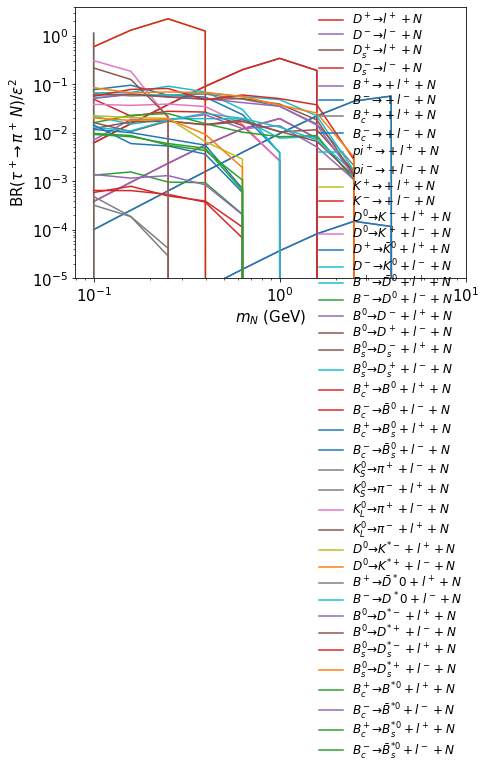

In [16]:
#linear scale
'''start=0.0001
stop=1
nsteps=100
masses=np.linspace(start, stop, num=nsteps)'''

#log scale
masses = np.logspace(-1,1,nsteps_mass+1)
masses=list(masses)


#production_channels is in a slightly wrong format, so edit it to be in a correct format
production_channels_fin=[]
for n in range(len(production_channels)):
    production_channels_fin.append(eval(production_channels[n])[0])
foresee.plot_production_branchings(
    masses = masses, 
    productions = production_channels_fin, 
    xlims=[0,10],ylims=[10**-5,4], 
    xlabel=r"$m_N$ (GeV)", 
    ylabel=r"BR($\tau^+ \to\, \pi^+ \, N) /\epsilon^2$",
    legendloc=(1.02,1.02),
    fs_label=12, 
    nsample=nsteps,
)

Let's first look at one benchmark scenario with $M_{N}=1$ GeV and $\epsilon=10^{-3.5}$ using the function `foresee.get_llp_spectrum()`. By default, the result are saved in the `model/LLP_spectra` directory. However, here set `save_file=False` since we don't want to save the results but set `do_plot=True` to plot them. 

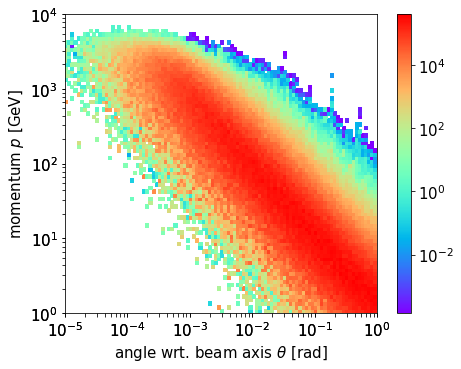

In [17]:
plot = foresee.get_llp_spectrum(mass=1, coupling=1, do_plot=True, save_file=False)
#plt.savefig(f'path')

We can now produce a set of LLP spectra for various masses  (chosen to be equally spaced in log(mass)) and unit coupling and save them. 

In [19]:
#removes br files, since this part will create them again
def delete_files_in_folder(folder_path):
    # Loop through all files in the folder and delete them
    file_names = os.listdir(folder_path)

    print(f'These files will be deleted: {file_names}')
    y_or_n = input("Are you sure? y/n")
    if y_or_n == 'y':
        for file_path in glob.glob(os.path.join(folder_path, '*')):
            try:
                os.remove(file_path)
                #print(file_path)
            except Exception as e:
                print(f'Error deleting {file_path}: {e}')
    else:
        pass
    print('files deleted')
#refreshes LLP_spectra folder so it does not interfere with previous runs
path="path_to_FORESEE/FORESEE/Models/HNL/model/LLP_spectra"
delete_files_in_folder(path)
print(os.listdir(path))

for mass in masses:
    foresee.get_llp_spectrum(mass=mass,coupling=1)

These files will be deleted: []
files deleted
[]
save data to file: ./model/LLP_spectra/14TeV_2body_411_-11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_-411_11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_431_-11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_-431_11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_521_-11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_-521_11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_541_-11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_-541_11_m_0.1.npy


/Users/alechewitt/Desktop/Git_felix_new/FORESEE/Models/HNL/../../src/foresee.py:468: RuntimeWarning: overflow encountered in exp
  if (theta < 0.017/ltas): probability = 1.- np.exp(- lq1/dbarz)
/Users/alechewitt/Desktop/Git_felix_new/FORESEE/Models/HNL/../../src/foresee.py:469: RuntimeWarning: overflow encountered in exp
  if (theta < 0.05/ltas): probability = 1.- np.exp(- ltas/dbarz)


save data to file: ./model/LLP_spectra/14TeV_2body_211_-11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_-211_11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_321_-11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_-321_11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_pseudo_421_-321_-11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_pseudo_-421_321_11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_pseudo_411_-311_-11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_pseudo_-411_311_11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_pseudo_521_-421_-11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_pseudo_-521_421_11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_pseudo_511_-411_-11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_pseudo_-511_411_11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_pseudo_531_-431_-11_m_0.1.npy

/Users/alechewitt/Desktop/Git_felix_new/FORESEE/Models/HNL/../../src/foresee.py:463: RuntimeWarning: overflow encountered in exp
  if (theta < 0.017/ltas): probability = 1.- np.exp(- ltan/dbarz)


save data to file: ./model/LLP_spectra/14TeV_3body_pseudo_310_211_11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_pseudo_310_-211_-11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_pseudo_130_211_11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_pseudo_130_-211_-11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_vector_421_-323_-11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_vector_-421_323_11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_vector_521_-423_-11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_vector_-521_423_11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_vector_511_-413_-11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_vector_-511_413_11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_vector_531_-433_-11_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_3body_vector_-531_433_11_m_0.1.npy
save data to file: ./model/LLP_spect

## 4. Count Event Rate in Detector

Before counting the number of decays within the detector volume, let us specify the detector geometry. For this we need

- the `distance` from the IP in meter (default: 480)
- the `length` in meter (default: 5)
- the `luminosity` in units of fb^-1 (default: 3000)
- the `selection` depending in `x.x` and `x.y` (default: `np.sqrt(x.x**2 + x.y**2)< 1`)
- the decay `channels` which the detector can see (default: None, meaning all of them)

The default correspond to the FASER2 detector.

In [20]:
distance, selection, length, luminosity, channels = 480, "np.sqrt(x.x**2 + x.y**2)< 1", 5, 3000, None
foresee.set_detector(distance=distance, selection=selection, length=length, luminosity=luminosity, channels=channels)

Let us look for one specific HNL mass $M_{N}=1$ GeV at how many particle decay inside the decay volume. This can be done using `get_events()` for which we need to specify again the mass and filename. Additionally, we can specify 

- the `couplings` for which we evaluate the event rate as numpy array (deault `np.logspace(-8,-3,51)`)
- the `preselectioncuts` when reading the LLP spectra in terms of momentum `p` and angle `th` (default: `th<0.01 and p>100`)
- the number `nsample` describing how many randomly choosen values of $\phi_{LLP}$ should sampled (default 1). This is only relevant for detectors that are not cylyndrical or not centered around the beam axis. 
- the production `modes` which should be considered
- the `energy` of the experiments

In [21]:
#you must use one of the masses from the list 'masses' above that generated and saved the llp spectra in order to get nonzero signals
output = foresee.get_events(mass=1, energy=energy, couplings=np.logspace(-3,-1,3))
coups, ctaus, nsigs, momenta, weights = output
for coup,ctau,nsig in zip(coups, ctaus, nsigs):
    print ("epsilon =", '{:5.3e}'.format(coup), ": nsignal =", '{:5.3e}'.format(nsig))

epsilon = 1.000e-03 : nsignal = 0.000e+00
epsilon = 1.000e-02 : nsignal = 0.000e+00
epsilon = 1.000e-01 : nsignal = 0.000e+00


The previous function also outputs the energy distribution of the HNL particles which decay inside the detector. Let's have a look at them.

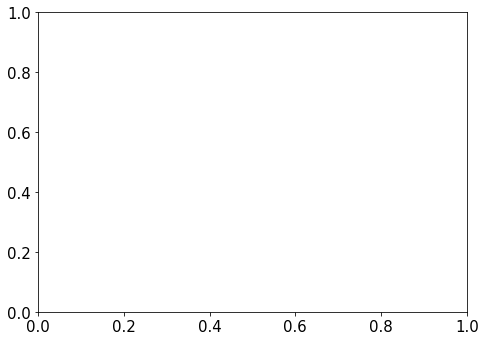

In [22]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
ens=[]
for coup,momentum,weight in zip(coups,momenta,weights):
    if sum(weight)<10**-3 : continue
    ax.hist([p.e for p in momentum],  weights=weight, bins=np.logspace(2,4, 20), histtype='step', label=r"$\epsilon=$"+str(coup)) 
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylim(10**-1,9*10**7) 
    ax.set_xlabel("E(N) [GeV]") 
    ax.set_ylabel("Number of Events per bin") 
    ax.legend(frameon=False, labelspacing=0)
#plt.savefig()
plt.tight_layout()
plt.show()

FORESEE also includes a function `write_events()` which obtains an unweighted sample of LLP decay events and saves them as a HEPMC file. For this function, we need to specify
- the `mass` and `coupling` of the LLP
- the collision `energy`
- the number of events `numberevent` that should be samples (optional, default=10)
- the `filename` of the output file (optional, default=`model/events/<mass>_<coupling>.hepmc`)
- the z-position (in meter) of the beginning of the decay volume (optional, default=0)
- a random `seed` (optional, default=None)
- the `decaychannels` for which the event should bbe written to file (optional, default=None meaning that all channels are written to file)

At the moment, FORESEE only supports 2-body LLP decays. For all other cases, including those where no final state information was specified when initiating the `Model`, the LLP will not be decayed. 

In [23]:
foresee.write_events(filename="model/events/test.hepmc", mass=1, coupling=1.000e-02, 
    energy="14", numberevent=10, zfront=0)

'foresee.write_events(filename="model/events/test.hepmc", mass=1, coupling=1.000e-02, \n    energy="14", numberevent=10, zfront=0)'

Let us have a look at a the output:

In [24]:
f = open("model/events/test.hepmc", 'r')
file_contents = f.read()
print (file_contents)

HepMC::Version 2.06.09
HepMC::IO_GenEvent-START_EVENT_LISTING
E 0 -1 -1. -1. -1. 0 -1 1 1 0 0 0
U GEV MM
C 280587.2778180303 0.
F 0 0 0 0 0 0 0 0 0
V -1 0 127.414694226 -639.4601323189 469.5233229137 0 1 0 0
P 1 32 0.0465839786 -0.2337924781 175.4923940171 175.4954050306 1.0 1 0 0 -1 0
E 1 -1 -1. -1. -1. 0 -1 1 1 0 0 0
U GEV MM
C 280587.2778180303 0.
F 0 0 0 0 0 0 0 0 0
V -1 0 -692.7057265451 -128.2402975696 3000.9108392954 0 1 0 0
P 1 32 -0.1935415728 -0.0358302638 134.111717873 134.1155904919 1.0 1 0 0 -1 0
E 2 -1 -1. -1. -1. 0 -1 1 1 0 0 0
U GEV MM
C 280587.2778180303 0.
F 0 0 0 0 0 0 0 0 0
V -1 0 444.7162641582 793.5815725113 549.6144055936 0 1 0 0
P 1 32 0.1801198267 0.3214179171 194.4105124625 194.413433457 1.0 1 0 0 -1 0
E 3 -1 -1. -1. -1. 0 -1 1 1 0 0 0
U GEV MM
C 280587.2778180303 0.
F 0 0 0 0 0 0 0 0 0
V -1 0 403.4087832226 -558.4020429582 4822.3815550968 0 1 2 0
P 1 32 0.2546875884 -0.352540836 303.0425898362 303.0445518491 1.0 2 0 0 -1 0
P 2 -211 0.2465709159 -0.2850565191 

## 5. Parameter Scan

In the following, we will get the LLP sensitivity reach for different detector configuraions. As an example, we show the FASER2 reach for dark photons for 3 scenarios. We just need to loop over different masses and use the previously introduced funtion `get_events`. The results will be written into a `.npy` file that we can store and plot later.

- the nominal/default setup

In [25]:
#setup for FASER during high luminosity (HL) era, energy should be initialized at 14 TeV

#specify setup
setup, distance, selection, length, luminosity, channels = f"HL_FASER", 480, "np.sqrt(x.x**2 + x.y**2)< .1", 1.5, 3000, None
foresee.set_detector(distance=distance, selection=selection, length=length, luminosity=luminosity, channels=channels)

label_exp_1 = "14TeV_" + setup

#get reach 
list_nevents = []    
for mass in masses:
    couplings, _, nevents, _, _ = foresee.get_events(mass=mass, energy=energy,couplings=np.logspace(-5,0,50+1))
    list_nevents.append(nevents)  
    
#save results
np.save(model.modelpath+"model/results/"+energy+"TeV_"+setup+".npy",[masses,couplings,list_nevents])

/opt/miniconda3/envs/forsee/lib/python3.10/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [26]:
#setup for FASER2 during high luminosity (HL) era, energy should be initialized at 14 TeV

#specify setup
setup, distance, selection, length, luminosity, channels = f"HL_FASER2", 620, "-1.5<x.x<1.5 and -.5<x.y<.5", 10, 3000, None
foresee.set_detector(distance=distance, selection=selection, length=length, luminosity=luminosity, channels=channels)

label_exp_2 = "14TeV_" + setup

#get reach 
list_nevents = []    
for mass in masses:
    couplings, _, nevents, _, _ = foresee.get_events(mass=mass, energy=energy,couplings=np.logspace(-5,0,50+1),nsample=5)
    list_nevents.append(nevents)  
    
#save results
np.save(model.modelpath+"model/results/"+energy+"TeV_"+setup+".npy",[masses,couplings,list_nevents])

In [27]:
#setup for FASER1 during high luminosity (HL) energy E=14 TeV and luminosity of 250 (run 3), energy should be initialized at 14 TeV
#specify setup
setup, distance, selection, length, luminosity, channels = "HL_FASER1", 480, "np.sqrt(x.x**2 + x.y**2)< .1", 1.5, 250, None
foresee.set_detector(distance=distance, selection=selection, length=length, luminosity=luminosity, channels=channels)

label_exp_3 = "14TeV_" + setup

#get reach 
list_nevents = []    
for mass in masses:
    couplings, _, nevents, _, _ = foresee.get_events(mass=mass, energy=energy,couplings=np.logspace(-5,0,50+1))
    list_nevents.append(nevents)  
    
#save results
np.save(model.modelpath+"model/results/"+energy+"TeV_"+setup+".npy",[masses,couplings,list_nevents])

'#setup for FASER1 during high luminosity (HL) energy E=14 TeV and luminosity of 250 (run 3), energy should be initialized at 14 TeV\n#I assume x is along the ground and y is perpendicular to the ground.\n#masses\n#masses = np.logspace(-1,1,20+1)\n#masses.append(1)\n#"np.sqrt(x.x**2 + x.y**2)< .1"\n#specify setup\nsetup, distance, selection, length, luminosity, channels = "HL_FASER1_111", 480, "np.sqrt(x.x**2 + x.y**2)< .1", 1.5, 250, None\nforesee.set_detector(distance=distance, selection=selection, length=length, luminosity=luminosity, channels=channels)\n\n#get reach \nlist_nevents = []    \nfor mass in masses:\n    couplings, _, nevents, _, _ = foresee.get_events(mass=mass, energy=energy,couplings=np.logspace(-5,0,50+1))\n    list_nevents.append(nevents)  \n    \n#save results\nnp.save(model.modelpath+"model/results/"+energy+"TeV_"+setup+".npy",[masses,couplings,list_nevents])'

## 6. Plot the Results

Now let's plot the results. We first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [29]:
setups = [
    [label_exp_1 + ".npy",    "HL FASER"  , "red",     "solid", 0., 3],
    [label_exp_2 + ".npy",    "HL FASER2"  , "blue",     "solid", 0., 3],
    [label_exp_3 + ".npy",    "HL FASER1"  , "blue",     "solid", 0., 3]
]

Then we specify all the existing bounds (filename in model/bounds directory, label, label position x, label position y, label rotation)

'["bounds_LHCb_el.txt",  "LHCb"  , 0    , 0         , 0  ]\n    ["bounds_el.txt", None,  0.220, 0.9*10**-4, 0  ],\n'

We then specify other projected sensitivitities (filename in model/bounds directory, color, label, label position x, label position y, label rotation)

In [31]:
bounds=[]
projections=[]

Finally, we can plot everything using `foresee.plot_reach()`. It returns a matplotlib instance, to which we can add further lines and which we can show or save. Below, we add the dark matter relict target line for a specific benchmark.

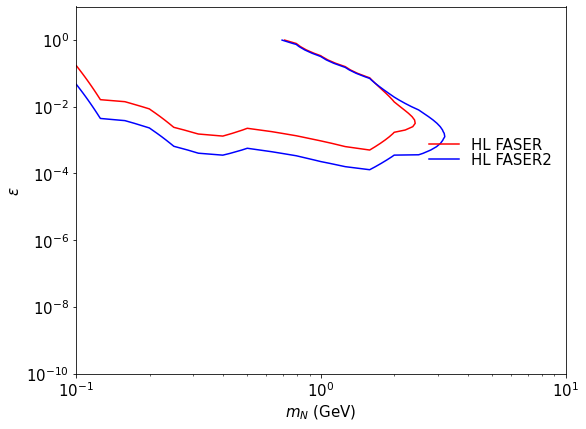

In [32]:
#plot_reach has been modified to pickle the figure
plot = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    projections=projections,
    title=None,
    xlims = [1e-1, 10], 
    ylims = [1e-10, 10e-0 ],
    xlabel=r"$m_{N}$ (GeV)", 
    ylabel=r"$\epsilon$",
    legendloc=(1,0.68),
    figsize=(8,6),
)
plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)


#plot.savefig("path",bbox_inches='tight')
plot.show()



## 7. Export Contours

It might also be useful to extract the contours lines, and save them as a text file. This can be done using the `extract_contours()` function. As example, let us export the FASER2 line. 

In [37]:
foresee.extract_contours(
    inputfile=f"model/results/{label_exp_1}.npy", 
    outputfile=f"model/lines/{label_exp_1}.txt"
)

foresee.extract_contours(
    inputfile=f"model/results/{label_exp_2}.npy", 
    outputfile=f"model/lines/{label_exp_2}.txt"
)

foresee.extract_contours(
    inputfile=f"model/results/{label_exp_3}.npy", 
    outputfile=f"model/lines/{label_exp_3}.txt"
)

'foresee.extract_contours(\n    inputfile=f"model/results/{label_exp_4}.npy", \n    outputfile=f"model/lines/{label_exp_4}.txt"\n)'

## Plot Production Cross Section 

We also can plot the production cross section as a function of the particle mass via `foresee.plot_production`. We do this below to show the production rate associated with different channels (commenting out the subleading channels): 

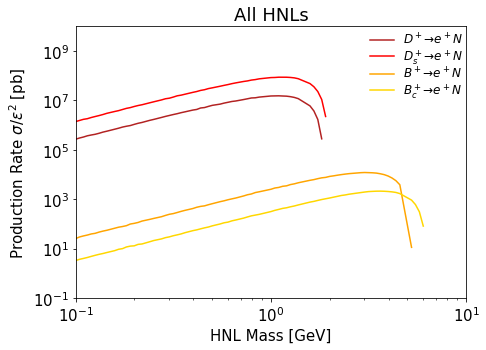

In [ ]:
productions = [
    ["2body_411_-11"     , [0.1,10]      , "firebrick"   , r"$D^+ \to e^+ N$"   ],   
    ["2body_431_-11"     , [0.1,10]      , "red"         , r"$D_s^+ \to e^+ N$" ],   
    ["2body_521_-11"     , [0.1,10]  , "orange"      , r"$B^+ \to e^+ N$"   ],  
    ["2body_541_-11"     , [0.1,10]  , "gold"        , r"$B_c^+ \to e^+ N$" ],   
    ["3body_411_-311_-11", None      , "blue"        , r"$D^+ \to \bar{K}^0 e^+ N$" ],   
    ["3body_421_-321_-11", None      , "deepskyblue" , r"$D^0 \to K^- e^+ N$"       ], 
    ["3body_511_-411_-11", [0.5,10]  , "green"       , r"$B^0 \to D^- e^+ N$"       ], 
    ["3body_531_-431_-11", [0.5,10]  , "limegreen"   , r"$B_s^+ \to D_s^- e^+ N$"   ], 
]

foresee.plot_production(
    masses = masses, 
    productions = productions,
    condition="True", 
    xlims=[0.1,10],ylims=[10**-1,10**10], 
    xlabel=r"HNL Mass [GeV]", 
    ylabel=r"Production Rate $\sigma/\epsilon^2$ [pb]",
    legendloc=(1.02,1.02),
    fs_label=12,
    title="All HNLs",
)

#plot.savefig("",bbox_inches='tight')
plot.show()